<a href="https://colab.research.google.com/github/Inaracrewc/Sales-forecasting/blob/main/Times_series_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 4.7MB/s 
     |████████████████████████████████| 194kB 11.1MB/s 
     |████████████████████████████████| 1.2MB 8.7MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 12.8MB 337kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [1]:
!pip install statsmodels
!conda install -c conda-forge statsmodels
!git clone git://github.com/statsmodels/statsmodels.git
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

/bin/bash: conda: command not found
fatal: destination path 'statsmodels' already exists and is not an empty directory.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.tsa.ar_model
import statsmodels.tsa.api
import statsmodels.api as sm
#import statsmodels.tsa.arima.model
import statsmodels.graphics.api
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
precovid_invoices = pd.read_csv('/content/gdrive/MyDrive/SALES_PREDICTION/17.03 PRECOVID Overzicht facturen_ no neg..csv')

In [8]:
print(precovid_invoices.shape)
pd.DataFrame(precovid_invoices.dtypes)

(2612, 6)


,0
Invoice_id,int64
order_id,int64
date,object
Customer_code,int64
Amount,float64
Is_holiday month,float64


In [9]:
precovid_invoices.head()

,Invoice_id,order_id,date,Customer_code,Amount,Is_holiday month
0,191055,195050,1/14/2019,10001,92.0,1.0
1,191067,195062,1/16/2019,10001,120.0,1.0
2,86920,151393,9/10/2018,10001,96.0,NaN
3,191503,195548,4/25/2019,10002,48.0,1.0
4,191984,196054,8/28/2019,10002,101.0,NaN


In [10]:
precovid_invoices.drop(['Invoice_id','order_id','Customer_code', 'Is_holiday month'],axis=1, inplace=True)

In [14]:
precovid_invoices.head()

,Amount
date,
2019-01-14,92.0
2019-01-16,120.0
2018-09-10,96.0
2019-04-25,48.0
2019-08-28,101.0


In [15]:
precovid_invoices.dtypes

Amount    float64
dtype: object

In [12]:
precovid_invoices['date'] = pd.to_datetime(precovid_invoices.date)

In [13]:
precovid_invoices.set_index('date', inplace=True)

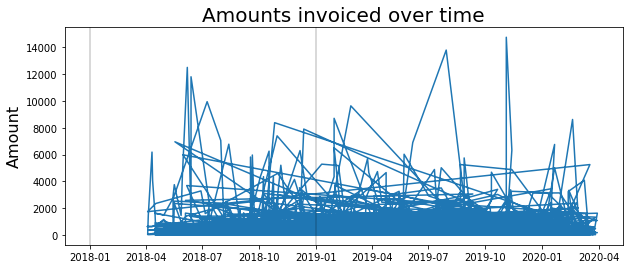

In [23]:
plt.figure(figsize=(10,4))
plt.plot(precovid_invoices.Amount)
plt.title('Amounts invoiced over time', fontsize=20)
plt.ylabel('Amount', fontsize=16)
for year in range(2018,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='-', alpha=0.2)


# **ACF**


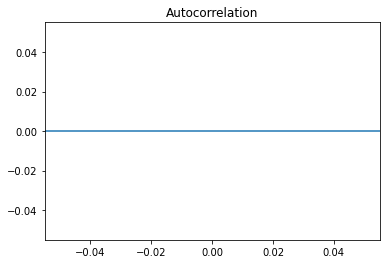

In [22]:
acf_plot = plot_acf(precovid_invoices.Amount, lags=5)
